In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as mh

import matplotlib as mpl
import matplotlib.gridspec as gridspec
import scipy.optimize as opt
from scipy.odr import *
#from astropy import table

font=24
style='normal'

In [2]:
data = np.genfromtxt('/Users/abubakribrahim/Desktop/observations/SGR1935/sgr1935_persistent_spectra/spectral_analysis/BBPL_xmm_nustarr_spec.qdp', skip_header=3)  #eeufs

a = np.argwhere(np.isnan(data[:,0]))
a = a.flatten()

data = np.vsplit(data,a)
data_1 = data[0]
data_1b = data[1][1:]
data_2 = data[2][1:]
data_2b = data[3][1:]

resdata_1 = data[4][1:]
resdata_1b = data[5][1:]
resdata_2 = data[6][1:]
resdata_2b = data[7][1:]


In [3]:
del_data = np.genfromtxt('/Users/abubakribrahim/Desktop/observations/SGR1935/sgr1935_persistent_spectra/spectral_analysis/BBPL_xmm_nustarr_best_del-res.qdp', skip_header=3)  #eeufs

b = np.argwhere(np.isnan(del_data[:,0]))
b = b.flatten()

del_data = np.vsplit(del_data,b)
del_data_1 = del_data[0]
del_data_1b = del_data[1][1:]
del_data_2 = del_data[2][1:]
del_data_2b = del_data[3][1:]


del_resdata_1 = del_data[4][1:]
del_resdata_1b = del_data[5][1:]
del_resdata_2 = del_data[6][1:]
del_resdata_2b = del_data[7][1:]


/var/folders/s9/66hwj2fn2gq55dpk69y4vmgr0000gn/T/ipykernel_31618/99882215.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  below.xaxis.set_ticklabels(['','',r'1',r'10'], minor=False)


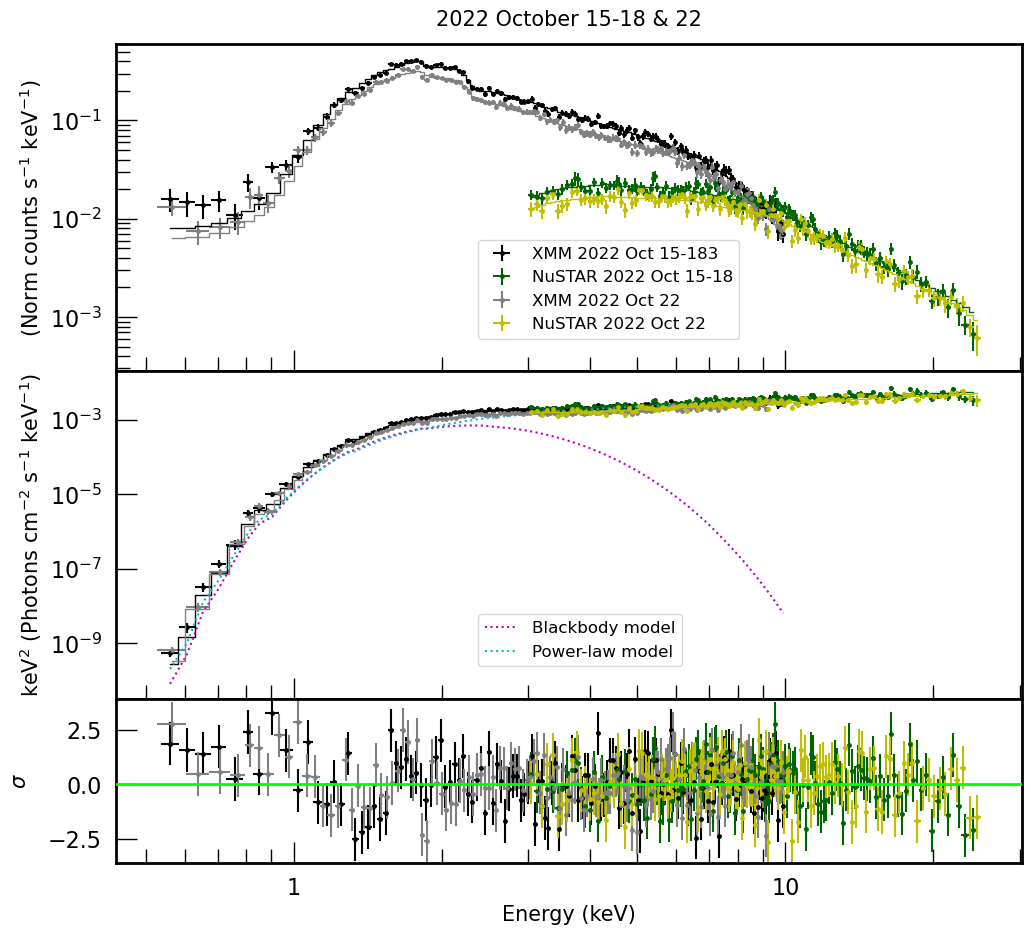

In [10]:
f1 = plt.figure(figsize=(11.69,8.27))  #a4

gs = gridspec.GridSpec(3,1, height_ratios=[2,2,1]) 
gs.update(wspace=0,hspace=0, top=1.1)

up =  plt.subplot(gs[0,0])
plt.setp(up.get_xticklabels(), visible=False)

up.errorbar(del_data_1[:,0], del_data_1[:,2], xerr=del_data_1[:,1], yerr=del_data_1[:,3], 
             fmt = '.', fillstyle = 'none', mec='k', mew = 2, ms=3, color='black',label = 'XMM 2022 Oct 15-183')
up.errorbar(del_data_1[:,0], del_data_1[:,4], color= 'k', lw=1, drawstyle = 'steps-mid') 

up.errorbar(del_data_1b[:,0], del_data_1b[:,2], xerr=del_data_1b[:,1], yerr=del_data_1b[:,3], 
             fmt = '.', fillstyle = 'none', mec='darkgreen', mew = 2, ms=3, color='darkgreen', label = 'NuSTAR 2022 Oct 15-18')
up.errorbar(del_data_1b[:,0], del_data_1b[:,4], color= 'darkgreen', lw=1, drawstyle = 'steps-mid') 



up.errorbar(del_data_2[:,0], del_data_2[:,2], xerr=del_data_2[:,1], yerr=del_data_2[:,3], 
             fmt = '.', fillstyle = 'none', mec='gray', mew = 2, ms=3, color='gray',label = 'XMM 2022 Oct 22')
up.errorbar(del_data_2[:,0], del_data_2[:,4], color= 'gray', lw=1, drawstyle = 'steps-mid') 

up.errorbar(del_data_2b[:,0], del_data_2b[:,2], xerr=del_data_2b[:,1], yerr=del_data_2b[:,3], 
             fmt = '.', fillstyle = 'none', mec='y', mew = 2, ms=3, color='y', label = 'NuSTAR 2022 Oct 22')
up.errorbar(del_data_2b[:,0], del_data_2b[:,4], color= 'y', lw=1, drawstyle = 'steps-mid') 

up.set_yscale('log')
up.set_xscale('log')

up.xaxis.set_visible(True)
#up.tick_params(axis='x', which='both',labelbottom='off')
#up.xaxis.set_ticklabels(['','',r'1',r'10',r'20',r'30'],minor=True)

up.set_ylabel('(Norm counts s$^{-1}$ keV$^{-1}$)', fontsize=15, fontweight=style)#, labelpad=23)
up.legend(loc=[0.4,0.1], fontsize=12) 
up.set_title('2022 October 15-18 & 22', fontsize=15, pad=13)


mid =  plt.subplot(gs[1,0])
plt.setp(mid.get_xticklabels(), visible=False)

mid.errorbar(data_1[:,0], data_1[:,2], xerr=data_1[:,1], yerr=data_1[:,3], 
             fmt = '.', fillstyle = 'none', mec='k', mew = 2, ms=3, color='black')#,label = 'XMM epoch-1 mid')
mid.errorbar(data_1[:,0], data_1[:,4], color= 'k', lw=1, drawstyle = 'steps-mid') 

mid.errorbar(data_1b[:,0], data_1b[:,2], xerr=data_1b[:,1], yerr=data_1b[:,3], 
             fmt = '.', fillstyle = 'none', mec='darkgreen', mew = 2, ms=3, color='darkgreen')#, label = 'NuSTAR epoch-1 mid')
mid.errorbar(data_1b[:,0], data_1b[:,4], color= 'darkgreen', lw=1, drawstyle = 'steps-mid') 

mid.errorbar(data_1[:,0], data_1[:,5], 
            fmt=':', fillstyle = 'none', mec='m', mew = 2, ms=3, color='m', label="Blackbody model")

mid.errorbar(data_1[:,0], data_1[:,6], 
            fmt=':', fillstyle = 'none', mec='c', mew = 2, ms=3, color='c', label="Power-law model")


mid.errorbar(data_2[:,0], data_2[:,2], xerr=data_2[:,1], yerr=data_2[:,3], 
             fmt = '.', fillstyle = 'none', mec='gray', mew = 2, ms=3, color='gray')#,label = 'XMM epoch-2 mid')
mid.errorbar(data_2[:,0], data_2[:,4], color= 'gray', lw=1, drawstyle = 'steps-mid') 

mid.errorbar(data_2b[:,0], data_2b[:,2], xerr=data_2b[:,1], yerr=data_2b[:,3], 
             fmt = '.', fillstyle = 'none', mec='y', mew = 2, ms=3, color='y')#, label = 'NuSTAR epoch-2 mid')
mid.errorbar(data_2b[:,0], data_2b[:,4], color= 'y', lw=1, drawstyle = 'steps-mid') 

mid.set_yscale('log')
mid.set_xscale('log')
mid.xaxis.set_visible(True)
mid.set_ylabel('keV$^2$ (Photons cm$^{-2}$ s$^{-1}$ keV$^{-1}$)', fontsize=15, fontweight=style)#, labelpad=23)
mid.legend(loc=[0.4,0.1], fontsize=12) 
#mid.xaxis.set_ticklabels(['','',r'1',r'10'], minor=False)



below = plt.subplot(gs[2,0], sharex=mid)

below.axhline(y = 0, color = 'lime', lw = 2, zorder=10)

below.errorbar(resdata_1[:,0], resdata_1[:,2], xerr=resdata_1[:,1], 
    yerr=resdata_1[:,3], fmt = '.', fillstyle = 'none', mec='k', mew = 2, ms=3, color='k')

below.errorbar(resdata_1b[:,0],resdata_1b[:,2], xerr=resdata_1b[:,1], 
    yerr=resdata_1b[:,3], fmt = '.', fillstyle = 'none', mec='darkgreen', mew = 2, ms=3, color='darkgreen')


below.errorbar(resdata_2[:,0], resdata_2[:,2], xerr=resdata_2[:,1], 
    yerr=resdata_2[:,3], fmt = '.', fillstyle = 'none', mec='gray', mew = 2, ms=3, color='gray')

below.errorbar(resdata_2b[:,0], resdata_2b[:,2], xerr=resdata_2b[:,1], 
    yerr=resdata_2b[:,3], fmt = '.', fillstyle = 'none', mec='y', mew = 2, ms=3, color='y')



below.set_xscale('log')
below.set_ylim([-3.6,3.95])

below.set_ylabel( '$\sigma$', fontsize = 15, fontweight=style, labelpad=13)
below.set_xlabel('Energy (keV)', fontsize = 15, fontweight=style)

below.xaxis.set_ticklabels(['','',r'1',r'10'], minor=False)

for axis in [up, mid, below]:
	axis.tick_params(which='major', width=1,length=15,labelsize=16,pad=10,direction='in')
	axis.tick_params(which='minor', width=1,length=10,labelsize=16,pad=10,direction='in')
	
	for ax in ['top','bottom','left','right']:
    		axis.spines[ax].set_linewidth(2)

plt.savefig('eeufspec_del_plot_SGRJ1935.pdf', bbox_inches = 'tight')
plt.show()

/var/folders/s9/66hwj2fn2gq55dpk69y4vmgr0000gn/T/ipykernel_31618/2328174039.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  below.xaxis.set_ticklabels(['','',r'1',r'10'], minor=False)


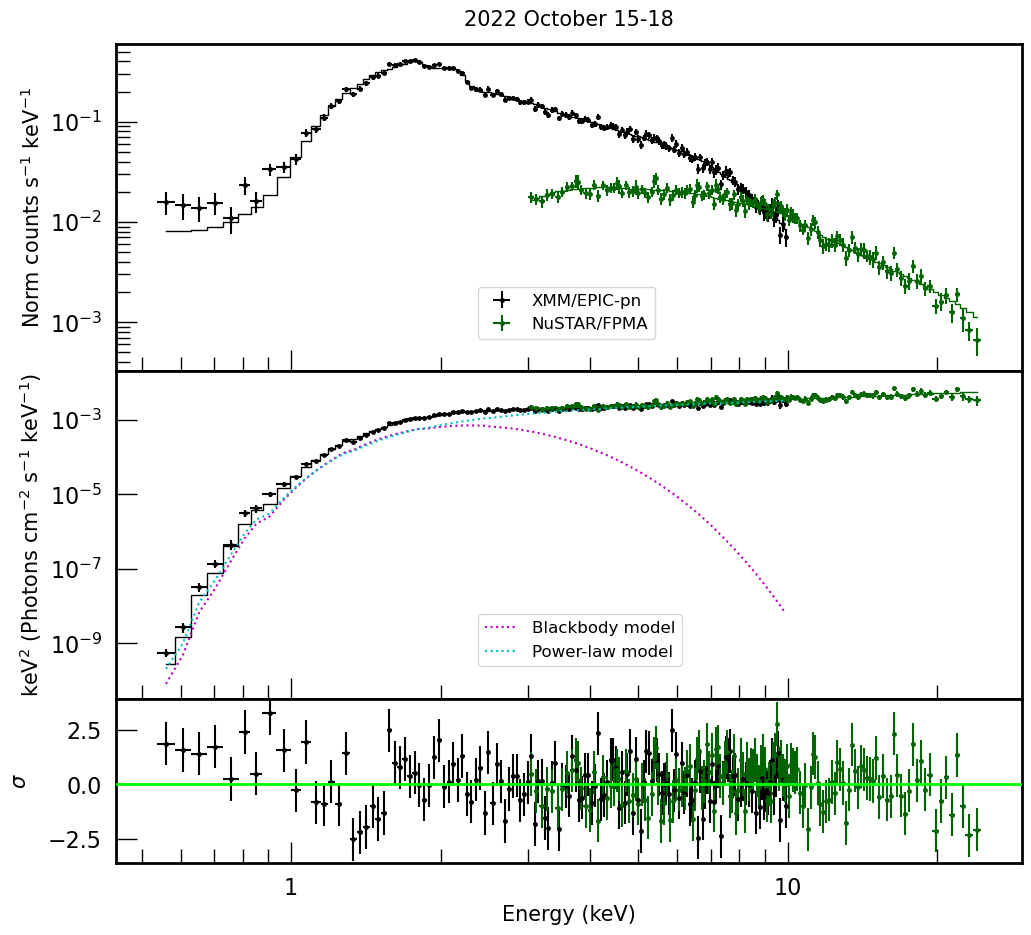

In [14]:
f1 = plt.figure(figsize=(11.69,8.27))  #a4

gs = gridspec.GridSpec(3,1, height_ratios=[2,2,1]) 
gs.update(wspace=0,hspace=0, top=1.1)

up =  plt.subplot(gs[0,0])
plt.setp(up.get_xticklabels(), visible=False)

up.errorbar(del_data_1[:,0], del_data_1[:,2], xerr=del_data_1[:,1], yerr=del_data_1[:,3], 
             fmt = '.', fillstyle = 'none', mec='k', mew = 2, ms=3, color='black',label = 'XMM/EPIC-pn')
up.errorbar(del_data_1[:,0], del_data_1[:,4], color= 'k', lw=1, drawstyle = 'steps-mid') 

up.errorbar(del_data_1b[:,0], del_data_1b[:,2], xerr=del_data_1b[:,1], yerr=del_data_1b[:,3], 
             fmt = '.', fillstyle = 'none', mec='darkgreen', mew = 2, ms=3, color='darkgreen', label = 'NuSTAR/FPMA')
up.errorbar(del_data_1b[:,0], del_data_1b[:,4], color= 'darkgreen', lw=1, drawstyle = 'steps-mid') 


up.set_yscale('log')
up.set_xscale('log')

up.xaxis.set_visible(True)
#up.tick_params(axis='x', which='both',labelbottom='off')
#up.xaxis.set_ticklabels(['','',r'1',r'10',r'20',r'30'],minor=True)

up.set_ylabel('Norm counts s$^{-1}$ keV$^{-1}$', fontsize=15, fontweight=style)#, labelpad=23)
up.legend(loc=[0.4,0.1], fontsize=12) 
up.set_title('2022 October 15-18', fontsize=15, pad=13)

mid =  plt.subplot(gs[1,0])
plt.setp(mid.get_xticklabels(), visible=False)

mid.errorbar(data_1[:,0], data_1[:,2], xerr=data_1[:,1], yerr=data_1[:,3], 
             fmt = '.', fillstyle = 'none', mec='k', mew = 2, ms=3, color='black')#,label = 'XMM epoch-1 mid')
mid.errorbar(data_1[:,0], data_1[:,4], color= 'k', lw=1, drawstyle = 'steps-mid') 

mid.errorbar(data_1b[:,0], data_1b[:,2], xerr=data_1b[:,1], yerr=data_1b[:,3], 
             fmt = '.', fillstyle = 'none', mec='darkgreen', mew = 2, ms=3, color='darkgreen') #, label = 'NuSTAR epoch-1 mid')
mid.errorbar(data_1b[:,0], data_1b[:,4], color= 'darkgreen', lw=1, drawstyle = 'steps-mid') 

mid.errorbar(data_1[:,0], data_1[:,5], 
            fmt=':', fillstyle = 'none', mec='m', mew = 2, ms=3, color='m', label="Blackbody model")

mid.errorbar(data_1[:,0], data_1[:,6], 
            fmt=':', fillstyle = 'none', mec='c', mew = 2, ms=3, color='c', label="Power-law model")

mid.set_yscale('log')
mid.set_xscale('log')
mid.xaxis.set_visible(True)
mid.set_ylabel('keV$^2$ (Photons cm$^{-2}$ s$^{-1}$ keV$^{-1}$)', fontsize=15, fontweight=style)#, labelpad=23)
mid.legend(loc=[0.4,0.1], fontsize=12) 
#mid.xaxis.set_ticklabels(['','',r'1',r'10'], minor=False)



below = plt.subplot(gs[2,0])

below.axhline(y = 0, color = 'lime', lw = 2, zorder=10)

below.errorbar(resdata_1[:,0], resdata_1[:,2], xerr=resdata_1[:,1], 
    yerr=resdata_1[:,3], fmt = '.', fillstyle = 'none', mec='k', mew = 2, ms=3, color='k')

below.errorbar(resdata_1b[:,0],resdata_1b[:,2], xerr=resdata_1b[:,1], 
    yerr=resdata_1b[:,3], fmt = '.', fillstyle = 'none', mec='darkgreen', mew = 2, ms=3, color='darkgreen')




below.set_xscale('log')
below.set_ylim([-3.6,3.95])

below.set_ylabel( '$\sigma$', fontsize = 15, fontweight=style, labelpad=13)
below.set_xlabel('Energy (keV)', fontsize = 15, fontweight=style)

below.xaxis.set_ticklabels(['','',r'1',r'10'], minor=False)

for axis in [up, mid, below]:
	axis.tick_params(which='major', width=1,length=15,labelsize=16,pad=10,direction='in')
	axis.tick_params(which='minor', width=1,length=10,labelsize=16,pad=10,direction='in')
	
	for ax in ['top','bottom','left','right']:
    		axis.spines[ax].set_linewidth(2)

plt.savefig('eeufspec_del_plot_SGRJ1935_epoch1.pdf', bbox_inches = 'tight')
plt.show()

/var/folders/s9/66hwj2fn2gq55dpk69y4vmgr0000gn/T/ipykernel_31618/910796341.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  below.xaxis.set_ticklabels(['','',r'1',r'10'], minor=False)


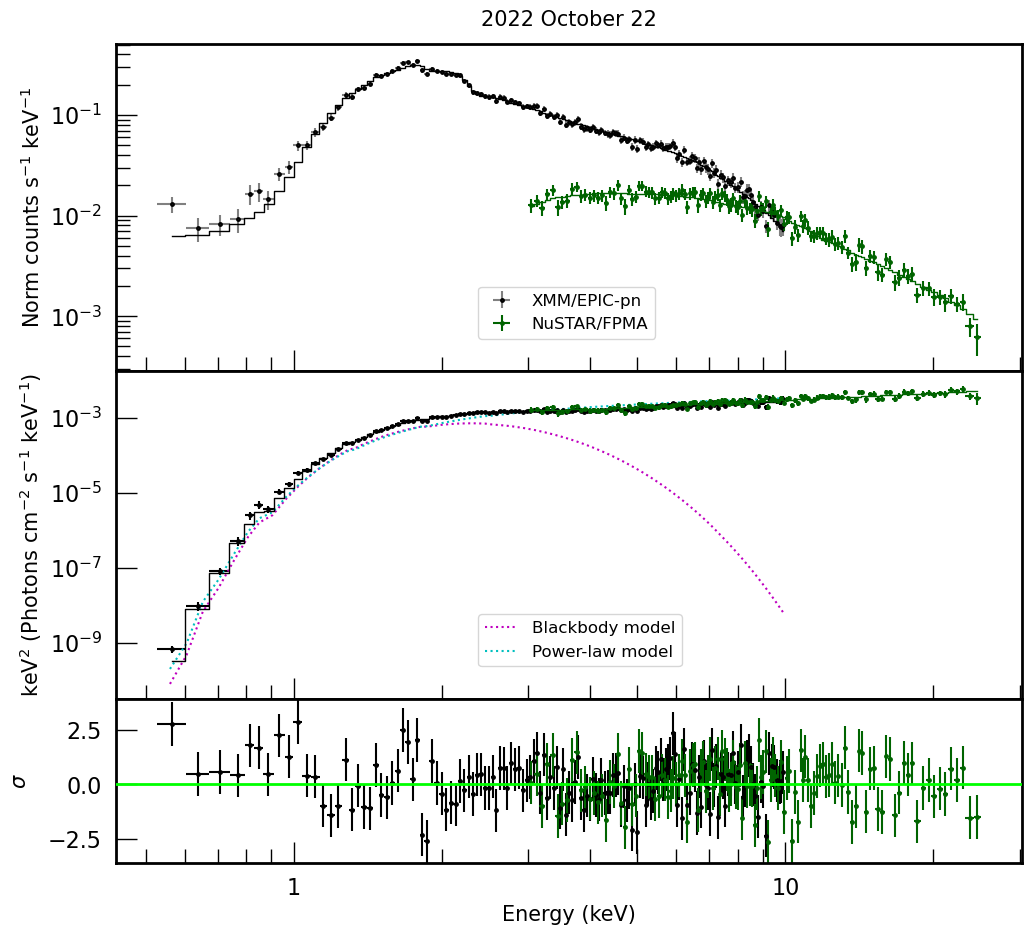

In [13]:
f1 = plt.figure(figsize=(11.69,8.27))  #a4

gs = gridspec.GridSpec(3,1, height_ratios=[2,2,1]) 
gs.update(wspace=0,hspace=0, top=1.1)

up =  plt.subplot(gs[0,0], sharex=below)
plt.setp(up.get_xticklabels(), visible=False)


up.errorbar(del_data_2[:,0], del_data_2[:,2], xerr=del_data_2[:,1], yerr=del_data_2[:,3], 
             fmt = '.', fillstyle = 'none', mec='k', mew = 2, ms=3, color='gray',label = 'XMM/EPIC-pn')
up.errorbar(del_data_2[:,0], del_data_2[:,4], color= 'k', lw=1, drawstyle = 'steps-mid') 

up.errorbar(del_data_2b[:,0], del_data_2b[:,2], xerr=del_data_2b[:,1], yerr=del_data_2b[:,3], 
             fmt = '.', fillstyle = 'none', mec='darkgreen', mew = 2, ms=3, color='darkgreen', label = 'NuSTAR/FPMA')
up.errorbar(del_data_2b[:,0], del_data_2b[:,4], color= 'darkgreen', lw=1, drawstyle = 'steps-mid') 

up.set_yscale('log')
up.set_xscale('log')

up.xaxis.set_visible(True)
#up.tick_params(axis='x', which='both',labelbottom='off')
#up.xaxis.set_ticklabels(['','',r'1',r'10',r'20',r'30'],minor=True)

up.set_ylabel('Norm counts s$^{-1}$ keV$^{-1}$', fontsize=15, fontweight=style)#, labelpad=23)
up.legend(loc=[0.4,0.1], fontsize=12) 
up.set_title('2022 October 22', fontsize=15, pad=13)

mid =  plt.subplot(gs[1,0], sharex=below)
plt.setp(mid.get_xticklabels(), visible=False)

mid.errorbar(data_1[:,0], data_1[:,5], 
            fmt=':', fillstyle = 'none', mec='m', mew = 2, ms=3, color='m', label="Blackbody model")

mid.errorbar(data_1[:,0], data_1[:,6], 
            fmt=':', fillstyle = 'none', mec='c', mew = 2, ms=3, color='c', label="Power-law model")


mid.errorbar(data_2[:,0], data_2[:,2], xerr=data_2[:,1], yerr=data_2[:,3], 
             fmt = '.', fillstyle = 'none', mec='k', mew = 2, ms=3, color='k')#,label = 'XMM epoch-2 mid')
mid.errorbar(data_2[:,0], data_2[:,4], color= 'k', lw=1, drawstyle = 'steps-mid') 

mid.errorbar(data_2b[:,0], data_2b[:,2], xerr=data_2b[:,1], yerr=data_2b[:,3], 
             fmt = '.', fillstyle = 'none', mec='darkgreen', mew = 2, ms=3, color='darkgreen')#, label = 'NuSTAR epoch-2 mid')
mid.errorbar(data_2b[:,0], data_2b[:,4], color= 'darkgreen', lw=1, drawstyle = 'steps-mid') 

mid.set_yscale('log')
mid.set_xscale('log')
mid.xaxis.set_visible(True)
mid.set_ylabel('keV$^2$ (Photons cm$^{-2}$ s$^{-1}$ keV$^{-1}$)', fontsize=15, fontweight=style)#, labelpad=23)
mid.legend(loc=[0.4,0.1], fontsize=12) 
#mid.xaxis.set_ticklabels(['','',r'1',r'10'], minor=False)



below = plt.subplot(gs[2,0], sharex=mid)

below.axhline(y = 0, color = 'lime', lw = 2, zorder=10)

below.errorbar(resdata_2[:,0], resdata_2[:,2], xerr=resdata_2[:,1], 
    yerr=resdata_2[:,3], fmt = '.', fillstyle = 'none', mec='k', mew = 2, ms=3, color='k')

below.errorbar(resdata_2b[:,0], resdata_2b[:,2], xerr=resdata_2b[:,1], 
    yerr=resdata_2b[:,3], fmt = '.', fillstyle = 'none', mec='darkgreen', mew = 2, ms=3, color='darkgreen')



below.set_xscale('log')
below.set_ylim([-3.6,3.95])

below.set_ylabel( '$\sigma$', fontsize = 15, fontweight=style, labelpad=13)
below.set_xlabel('Energy (keV)', fontsize = 15, fontweight=style)

below.xaxis.set_ticklabels(['','',r'1',r'10'], minor=False)

for axis in [up, mid, below]:
	axis.tick_params(which='major', width=1,length=15,labelsize=16,pad=10,direction='in')
	axis.tick_params(which='minor', width=1,length=10,labelsize=16,pad=10,direction='in')
	
	for ax in ['top','bottom','left','right']:
    		axis.spines[ax].set_linewidth(2)

plt.savefig('eeufspec_del_plot_SGRJ1935_epoch2.pdf', bbox_inches = 'tight')
plt.show()